## Setup

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [1]:
import pandas as pd
from IPython.display import display #formatação bonita
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

## Code

In [ ]:
path= r"C:\Users\Laboratorio\Documents\Gabi_Códigos\Resultados\teste_4_plastic_snake_Fidel_webcam_0_0DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.csv"
df = pd.read_csv(path)

NameError: name 'pandas' is not defined

Check data frame

In [5]:
display(df.head())

,scorer,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.1,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.2,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.3,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.4,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.5,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.6,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.7,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.8,...,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.35,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.36,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.37,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.38,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.39,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.40,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.41,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.42,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.43,DLC_resnet50_Rede-webcam_0Jan8shuffle1_250000.44
0,bodyparts,nose,nose,nose,earL,earL,earL,earR,earR,earR,...,legL1,legL2,legL2,legL2,legR1,legR1,legR1,legR2,legR2,legR2
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,601.8396606445312,359.1556396484375,0.9619277119636536,598.772705078125,334.887451171875,0.9985496401786804,576.1226806640625,370.9056701660156,0.9972473978996277,...,0.5328787565231323,630.1619873046875,342.2890319824219,0.9747299551963806,523.5410766601562,317.9914245605469,0.2629334628582001,530.5049438476562,331.7465515136719,0.07005097717046738
3,1,600.1629638671875,359.67071533203125,0.9533172249794006,598.85595703125,335.15863037109375,0.9980362057685852,575.848876953125,371.6139221191406,0.997027575969696,...,0.44380640983581543,630.373779296875,342.2709655761719,0.9780957698822021,523.9572143554688,318.3683776855469,0.29396942257881165,530.4220581054688,330.9823303222656,0.08243399858474731
4,2,599.5390014648438,360.2591247558594,0.9405509829521179,599.3538208007812,336.154296875,0.9970769882202148,575.0077514648438,371.1943664550781,0.9960075616836548,...,0.3305809497833252,628.4654541015625,342.64739990234375,0.978750467300415,524.6300048828125,318.03448486328125,0.2404964417219162,531.10498046875,331.0338134765625,0.07877861708402634


Select box area

In [6]:
# Carregar um frame do vídeo
video_path = "H:\Shared drives\DLC - Sagui\dlc_sagui\Rede_ingrid_iteration-1\videos\Teste_3_plastic_snake_Suri_webcam_0_0.mp4"
cap = cv2.VideoCapture(video_path)

In [9]:
ret, frame = cap.read()  # Ler o primeiro frame
cap.release()
# Definir os valores de corte
x1, x2 = 500, 750
y1, y2 = 250, 490
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

# Desenhar o retângulo do crop na imagem
frame_with_rect = frame.copy()
cv2.rectangle(frame_with_rect, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Converter BGR para RGB
frame_with_rect_rgb = cv2.cvtColor(frame_with_rect, cv2.COLOR_BGR2RGB)

# Plotar a imagem com o retângulo
plt.figure(figsize=(10, 6))
plt.imshow(frame_with_rect_rgb)
plt.title("Frame com área de crop")
plt.axis('off')  # Remove os eixos
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

Head direction

In [9]:
df_segmented = pd.read_csv(path, header=[1, 2]) #Indica que as linhas 2 e 3 do arquivo (índices 1 e 2) são usadas como cabeçalhos

In [8]:
# Extrair coordenadas
nose_x = df_segmented[('nose', 'x')].values
nose_y = df_segmented[('nose', 'y')].values
earL_x = df_segmented[('earL', 'x')].values
earL_y = df_segmented[('earL', 'y')].values
earR_x = df_segmented[('earR', 'x')].values
earR_y = df_segmented[('earR', 'y')].values

# Calcular o ponto médio entre as orelhas
mid_ear_x = (earL_x + earR_x) / 2
mid_ear_y = (earL_y + earR_y) / 2

# Calcular o vetor direção (do ponto médio para o nariz)
direction_x = nose_x - mid_ear_x
direction_y = nose_y - mid_ear_y

# Normalizar o vetor para ter comprimento 1
norm = np.sqrt(direction_x**2 + direction_y**2)
direction_x_norm = direction_x / norm
direction_y_norm = direction_y / norm

# Calcular o ângulo de direção em graus (0-360)
angles_rad = np.arctan2(direction_y_norm, direction_x_norm)
angles_deg = np.degrees(angles_rad) % 360


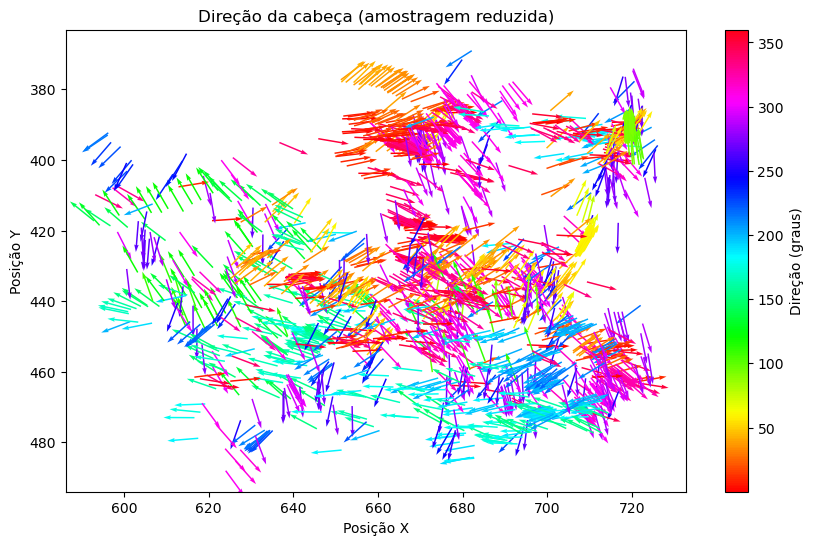

In [10]:
plt.figure(figsize=(10, 6))
sample_rate = 10  # Mostra 1 em cada 10 frames
plt.quiver(mid_ear_x[::sample_rate], mid_ear_y[::sample_rate],
           direction_x_norm[::sample_rate], direction_y_norm[::sample_rate],
           angles_deg[::sample_rate], scale=20, cmap='hsv')
plt.colorbar(label='Direção (graus)')
plt.title('Direção da cabeça (amostragem reduzida)')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.gca().invert_yaxis()
plt.show()

Head direction output in video

In [9]:
# Extrair coordenadas
nose_x = df_segmented[('nose', 'x')].values
nose_y = df_segmented[('nose', 'y')].values
earL_x = df_segmented[('earL', 'x')].values
earL_y = df_segmented[('earL', 'y')].values
earR_x = df_segmented[('earR', 'x')].values
earR_y = df_segmented[('earR', 'y')].values

In [ ]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print    ("Erro ao carregar o vídeo. Verifique o caminho do arquivo.")
    exit()

Erro ao carregar o vídeo. Verifique o caminho do arquivo.


: 

In [1]:
# Get video information
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

NameError: name 'cap' is not defined

In [ ]:
# Definir o codec e criar o objeto VideoWriter para salvar o vídeo
output_path = "output_video_with_T.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para MP4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [ ]:
frame_idx = 0
while cap.isOpened() and frame_idx < len(nose_x):
    ret, frame = cap.read()
    if not ret:
        break

    # Desenhar as linhas formando o "T" diretamente no frame
    # Linha entre as orelhas (base do T) - Vermelho (BGR: 0, 0, 255)
    cv2.line(frame, 
             (int(earL_x[frame_idx]), int(earL_y[frame_idx])), 
             (int(earR_x[frame_idx]), int(earR_y[frame_idx])), 
             (0, 0, 255), 2)
    
    # Linha do ponto médio das orelhas até o nariz (haste do T) - Verde (BGR: 0, 255, 0)
    mid_ear_x = (earL_x[frame_idx] + earR_x[frame_idx]) / 2
    mid_ear_y = (earL_y[frame_idx] + earR_y[frame_idx]) / 2
    cv2.line(frame, 
             (int(mid_ear_x), int(mid_ear_y)), 
             (int(nose_x[frame_idx]), int(nose_y[frame_idx])), 
             (0, 255, 0), 2)

    # Adicionar pontos para visualização
    cv2.circle(frame, (int(earL_x[frame_idx]), int(earL_y[frame_idx])), 5, (0, 0, 255), -1)  # Orelha esquerda - Vermelho
    cv2.circle(frame, (int(earR_x[frame_idx]), int(earR_y[frame_idx])), 5, (0, 0, 255), -1)  # Orelha direita - Vermelho
    cv2.circle(frame, (int(nose_x[frame_idx]), int(nose_y[frame_idx])), 5, (0, 255, 0), -1)    # Nariz - Verde

    # Escrever o frame no vídeo de saída
    out.write(frame)

    frame_idx += 1

Vídeo salvo em: output_video_with_T.mp4
Processamento concluído. Total de frames processados: 19817


In [ ]:
# Release video
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Saved in: {output_path}")
print(f"Processing completed. Total frames processed: {frame_idx}")